<a href="https://colab.research.google.com/github/LuisOtilioZuniga/Programaci-n-para-anal-tica-descriptiva-y-predictiva/blob/main/Pr%C3%A1cticaRegresionDatosCategoricos%2C_263349.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**NOMBRE:** LUIS OTILIO Z√ö√ëIGA PR√ìSPERO
**MATRICULA:** 263349

# **Pr√°ctica 25: Regresi√≥n con Datos Categ√≥ricos**

** Regresi√≥n lineal con datos categ√≥ricos: Costos, Localidades y Salarios**

üìå Objetivos de la Pr√°ctica:
Al finalizar esta pr√°ctica, los estudiantes ser√°n capaces de:

- Codificar variables categ√≥ricas usando one-hot encoding con K-1 para problemas de regresi√≥n
- Realizar AED
- Construir un modelo de regresi√≥n con variables dummy
- Interpretar los resultados de los coeficientes
- Analizar los resultados de los errores residuales
- Calcular el desempe√±o del modelo de regresi√≥n.

Problema: Se podr√≠a argumentar que el salario est√° relacionado con el costo de la educaci√≥n. Por lo tanto, para analizar este argumentos veremos qu√© sucede cuando usamos las variables independientes cost y location.

# 1. Carga de datos

Carga el conjunto de datos college.csv, que est√° en campus virtual, en un dataframe. Elige de este conjunto las columnas salary (variable dependiente), cost(variable independiente - num√©rica) y location (variable independiente categ√≥rica).

Realiza lo siguiente:

*   Convierte si es necesario la variable location a tipo de dato categ√≥rico
*   Usa la instrucci√≥n describe() en las variables salary y cost
* Cuenta la cantidad de datos que hay por categor√≠a en location
* Convierte la variable location usando one-hot encoding



Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
Primeras filas del dataset:
   id                                         name  salary    cost   public  \
0   1  Massachusetts Institute of Technology (MIT)  119000  189300  Private   
1   2                           Harvard University  121000  189600  Private   
2   3                            Dartmouth College  123000  188400  Private   
3   4                         Princeton University  123000  188700  Private   
4   5                              Yale University  110000  194200  Private   

  location  
0       NE  
1       NE  
2       NE  
3       NE  
4       NE  

Tipos de datos iniciales:
salary       int64
cost         int64
location    object
dtype: object

Tipos de datos despu√©s de conversi√≥n:
salary         int64
cost           int64
location    category
dtype: object

Estad√≠sticas descriptivas de salary y cost:
              salary        

/tmp/ipython-input-3261971455.py:57: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='location', data=df, palette=blue_palette)
/tmp/ipython-input-3261971455.py:57: UserWarning: The palette list has more values (6) than needed (4), which may not be intended.
  sns.countplot(x='location', data=df, palette=blue_palette)


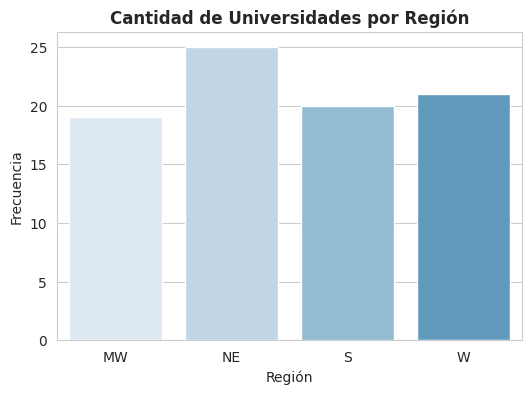

In [10]:

#Bibliotecas necesarias
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm

# Paleta de colores, tonos azules
# Esta paleta se utilizar√° en todos los gr√°ficos de la pr√°ctica
blue_palette = sns.color_palette("Blues", n_colors=6)
sns.set_palette(blue_palette)
sns.set_style("whitegrid")

# Carga el conjunto de datos college.csv y verifica que su carga sea correcta.
from google.colab import drive
drive.mount('/content/drive')

#Leemos el CSV college.csv
df = pd.read_csv('drive/MyDrive/Colab Notebooks/Programaci√≥n para anal√≠tica descriptiva y predictiva/SEMANA 11/college.csv')

# Mostramos las primeras filas del dataframe para verificar que se haya cargado correctamente
print("Primeras filas del dataset:")
print(df.head(5))

# PUNTO 1.

# Nos quedamos con las columnas relevantes: salary, cost y location
df = df[['salary', 'cost', 'location']]

# Verificamos los tipos de datos y convertimos 'location' a categ√≥rica si es necesario
print("\nTipos de datos iniciales:")
print(df.dtypes)

# Si 'location' no est√° en formato categ√≥rico, la convertimos
df['location'] = df['location'].astype('category')

print("\nTipos de datos despu√©s de conversi√≥n:")
print(df.dtypes)

# Estad√≠sticas descriptivas de las variables num√©ricas
# describe() nos ayuda a obtener informaci√≥n b√°sica sobre las variables num√©ricas
print("\nEstad√≠sticas descriptivas de salary y cost:")
print(df[['salary', 'cost']].describe())

# Conteo de datos por categor√≠a en 'location'
print("\nCantidad de datos por ubicaci√≥n (location):")
print(df['location'].value_counts())

# Aplicaci√≥n de One-Hot Encoding a la variable categ√≥rica 'location'
# Se utiliza drop_first=True para aplicar el m√©todo K-1 (evita multicolinealidad)
df_encoded = pd.get_dummies(df, columns=['location'], drop_first=True)

print("\nPrimeras filas despu√©s del One-Hot Encoding:")
print(df_encoded.head())

# Visualizaci√≥n del conteo de cada categor√≠a en 'location'
plt.figure(figsize=(6,4))
sns.countplot(x='location', data=df, palette=blue_palette)
plt.title('Cantidad de Universidades por Regi√≥n', fontsize=12, fontweight='bold')
plt.xlabel('Regi√≥n')
plt.ylabel('Frecuencia')
plt.show()

**OBSERVACIONES PUNTO 1:**
En esta primera parte se cargaron los datos del archivo college.csv y se seleccionaron las columnas necesarias para el an√°lisis: salary, cost y location. Se verificaron los tipos de datos y se convirti√≥ la variable location en categ√≥rica para poder trabajarla correctamente dentro del modelo. Posteriormente, se aplic√≥ el m√©todo one-hot encoding con la opci√≥n K-1 para transformar la variable categ√≥rica en variables num√©ricas sin generar redundancia. Tambi√©n se revisaron las estad√≠sticas descriptivas de salary y cost, y se observ√≥ la cantidad de universidades por regi√≥n mediante un gr√°fico.

# 2. An√°lisis Exploratorio de los Datos

Realiza un an√°lisis exploratorio de los datos y discute lo que observas en cada gr√°fica.


*   Crea un histograma de la columna salary. Discute lo que observas
* Crea un diagrama de dispersi√≥n de salary vs cost, considerando lo siguiente: para cada punto elegir√°s un color que represente la localidad en la que est√° el salario y el costo de la educaci√≥n. Por lo tanto el diagrama de dispersi√≥n deber√≠a tener puntos en 4 colores distintos. Discute lo que observas
* Emplea un boxplot para saber si hay diferencias en los costos seg√∫n la ubicaci√≥n, es decir, con boxplot deber√°s analizar la distribuci√≥n de cost por localidad. Discute lo que observas




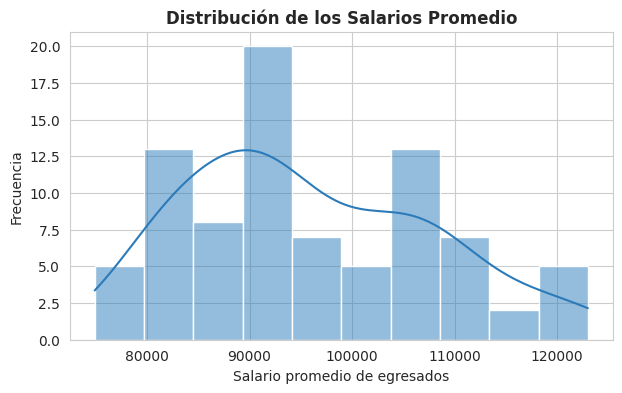

/tmp/ipython-input-2567098759.py:11: UserWarning: The palette list has more values (6) than needed (4), which may not be intended.
  sns.scatterplot(x='cost', y='salary', hue='location', data=df, palette=blue_palette, s=70)


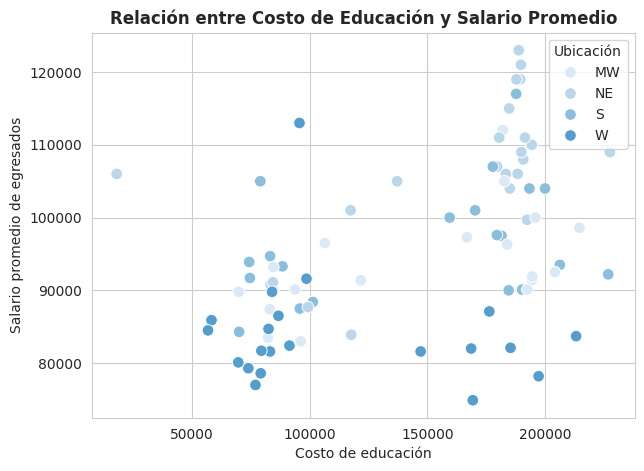

/tmp/ipython-input-2567098759.py:20: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='location', y='cost', data=df, palette=blue_palette)
/tmp/ipython-input-2567098759.py:20: UserWarning: The palette list has more values (6) than needed (4), which may not be intended.
  sns.boxplot(x='location', y='cost', data=df, palette=blue_palette)


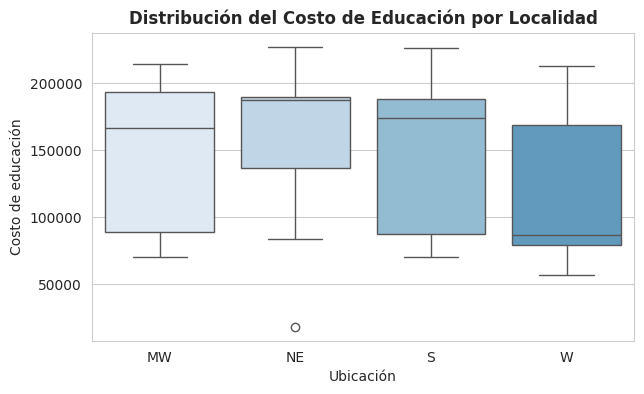

In [11]:
# 1. Histograma de la variable 'salary'
plt.figure(figsize=(7,4))
sns.histplot(df['salary'], bins=10, kde=True, color=blue_palette[4])
plt.title('Distribuci√≥n de los Salarios Promedio', fontsize=12, fontweight='bold')
plt.xlabel('Salario promedio de egresados')
plt.ylabel('Frecuencia')
plt.show()

# 2. Diagrama de dispersi√≥n: salary vs cost, coloreado por location
plt.figure(figsize=(7,5))
sns.scatterplot(x='cost', y='salary', hue='location', data=df, palette=blue_palette, s=70)
plt.title('Relaci√≥n entre Costo de Educaci√≥n y Salario Promedio', fontsize=12, fontweight='bold')
plt.xlabel('Costo de educaci√≥n')
plt.ylabel('Salario promedio de egresados')
plt.legend(title='Ubicaci√≥n')
plt.show()

# 3. Boxplot del costo por localidad
plt.figure(figsize=(7,4))
sns.boxplot(x='location', y='cost', data=df, palette=blue_palette)
plt.title('Distribuci√≥n del Costo de Educaci√≥n por Localidad', fontsize=12, fontweight='bold')
plt.xlabel('Ubicaci√≥n')
plt.ylabel('Costo de educaci√≥n')
plt.show()

**OBSERVACIONES PUNTO 2.**
En el histograma de salarios se observa que la mayor√≠a de las universidades tienen salarios promedio concentrados entre los 85,000 y 100,000 d√≥lares, mostrando una distribuci√≥n algo sesgada hacia la derecha, lo que indica que existen algunas instituciones con salarios m√°s altos pero menos frecuentes.

En el diagrama de dispersi√≥n, se aprecia una tendencia positiva entre el costo de la educaci√≥n y el salario promedio: en general, las universidades con costos m√°s altos tienden a presentar salarios mayores. Adem√°s, los colores permiten ver que esta relaci√≥n puede variar ligeramente entre regiones.

Finalmente, en el boxplot se observa que los costos de educaci√≥n var√≠an por localidad, aunque las regiones parecen tener medianas cercanas, destacando que la regi√≥n NE presenta una mayor dispersi√≥n en los costos. En conjunto, el an√°lisis sugiere que tanto la ubicaci√≥n como el costo pueden tener cierta influencia sobre los salarios promedio.

# 3. Construcci√≥n del modelo de regresi√≥n

- Construye el modelo de regresi√≥n usando los datos de salario, costo y location. Recuerda que esta √∫ltima debe ser en su versi√≥n codificada con one-hot encoding.
- Imprime los coeficientes e interpreta qu√© significan cuando se sustituyen valores en costo, y location (versi√≥n codificada). Si no recuerdas c√≥mo se hace esta interpretaci√≥n consulta los videos.


In [16]:
# Convertimos las variables booleanas a tipo num√©rico (0 y 1)
df_encoded = df_encoded.astype({'location_NE': int,
                                'location_S': int,
                                'location_W': int})

# Recordemos que el dataframe 'df_encoded' ya contiene las variables:
# salary (dependiente), cost y las variables dummy de location (independientes)

# Definimos la variable dependiente (Y) y las independientes (X)
X = df_encoded.drop(columns='salary')  # Variables independientes
y = df_encoded['salary']               # Variable dependiente

# Agregamos una constante para el t√©rmino independiente del modelo (Œ≤‚ÇÄ)
X = sm.add_constant(X)

# Verificamos tipos de datos
print("Tipos de datos despu√©s de convertir a num√©ricos:\n", X.dtypes)

# Construimos el modelo de regresi√≥n lineal
modelo = sm.OLS(y, X).fit()

# Mostramos el resumen del modelo
print(modelo.summary())

# Interpretaci√≥n de los coeficientes
# Obtenemos los coeficientes de forma m√°s simple
print("\nCoeficientes del modelo:")
print(modelo.params)

Tipos de datos despu√©s de convertir a num√©ricos:
 const          float64
cost             int64
location_NE      int64
location_S       int64
location_W       int64
dtype: object
                            OLS Regression Results                            
Dep. Variable:                 salary   R-squared:                       0.571
Model:                            OLS   Adj. R-squared:                  0.549
Method:                 Least Squares   F-statistic:                     26.57
Date:                Sat, 25 Oct 2025   Prob (F-statistic):           4.96e-14
Time:                        01:56:29   Log-Likelihood:                -882.12
No. Observations:                  85   AIC:                             1774.
Df Residuals:                      80   BIC:                             1786.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                  coef    std

**OBSERVACIONES PUNTO 3:**
En este punto se construy√≥ un modelo de regresi√≥n lineal m√∫ltiple para analizar c√≥mo el costo y la ubicaci√≥n influyen en el salario promedio. El modelo explic√≥ alrededor del 57 % de la variaci√≥n en los salarios, mostrando que el costo tiene un efecto positivo y significativo: a mayor costo educativo, el salario promedio tiende a ser m√°s alto.

Respecto a la ubicaci√≥n, las universidades del Noreste (NE) presentan salarios notablemente mayores, mientras que en el Oeste (W) tienden a ser m√°s bajos. La regi√≥n Sur (S) no mostr√≥ diferencias significativas. En conjunto, los resultados confirman que tanto el costo como la regi√≥n influyen de forma importante en los salarios de los egresados.

# 4. An√°lisis de Residuos

- Construyen una visualizaci√≥n de predicciones (salario estimado) vs valores reales (salario real).
- Crea una gr√°fica de los errores residuales. Discute lo que observas

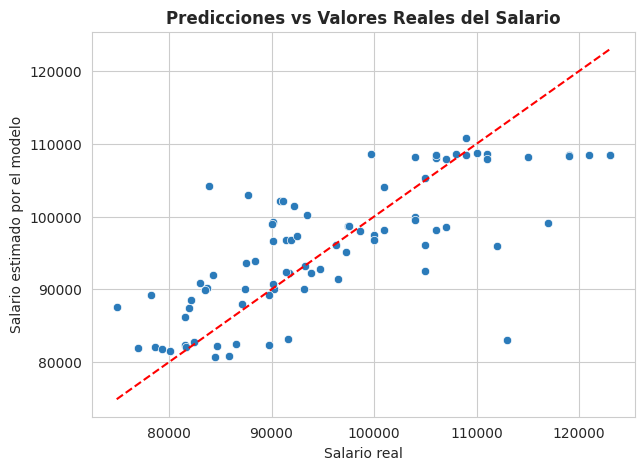

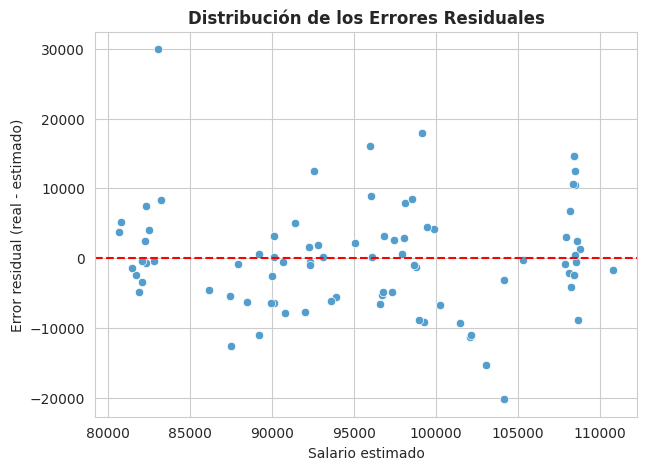

In [17]:
# 1. Predicciones vs valores reales
# Obtenemos las predicciones del modelo
y_pred = modelo.predict(X)

plt.figure(figsize=(7,5))
sns.scatterplot(x=y, y=y_pred, color=blue_palette[4])
plt.plot([y.min(), y.max()], [y.min(), y.max()], 'r--')  # L√≠nea de referencia
plt.title('Predicciones vs Valores Reales del Salario', fontsize=12, fontweight='bold')
plt.xlabel('Salario real')
plt.ylabel('Salario estimado por el modelo')
plt.show()

# 2. Gr√°fico de residuos
residuos = y - y_pred

plt.figure(figsize=(7,5))
sns.scatterplot(x=y_pred, y=residuos, color=blue_palette[3])
plt.axhline(0, color='r', linestyle='--')  # L√≠nea base de referencia
plt.title('Distribuci√≥n de los Errores Residuales', fontsize=12, fontweight='bold')
plt.xlabel('Salario estimado')
plt.ylabel('Error residual (real - estimado)')
plt.show()

**OBSERVACIONES PUNTO 4:**
En el gr√°fico de predicciones vs valores reales, los puntos se agrupan cerca de la l√≠nea roja diagonal, lo que muestra que el modelo logra estimar correctamente los salarios para la mayor√≠a de las universidades. Sin embargo, se aprecia cierta dispersi√≥n, especialmente en los valores m√°s altos, lo que indica que el modelo tiende a subestimar algunos salarios altos y sobreestimar algunos bajos.

En la gr√°fica de errores residuales, los puntos se distribuyen alrededor de la l√≠nea cero sin un patr√≥n definido, lo que sugiere que los residuos son aleatorios y el modelo no presenta un sesgo sistem√°tico. Aunque existen algunos valores alejados del eje (outliers), en general, los errores se mantienen dentro de un rango razonable, lo que confirma un ajuste adecuado y un desempe√±o aceptable del modelo.

# 5. Eval√∫a el modelo

- Calcula el MSE del modelo construido. Recuerda que usas el propio conjunto de datos (No hablamos nada de entrenamiento y test).
- Calcula el R¬≤ Score

Discute estos resultados obtenidos.

In [18]:
from sklearn.metrics import mean_squared_error, r2_score

# Calculamos el MSE (Error Cuadr√°tico Medio)
mse = mean_squared_error(y, y_pred)

# Calculamos el R¬≤ (coeficiente de determinaci√≥n)
r2 = r2_score(y, y_pred)

# Mostramos los resultados
print(f"MSE del modelo: {mse:.2f}")
print(f"R¬≤ Score del modelo: {r2:.3f}")

MSE del modelo: 60480269.15
R¬≤ Score del modelo: 0.571


**OBSERVACIONES PUNTO 5:**
El modelo obtuvo un MSE (Error Cuadr√°tico Medio) de aproximadamente 60480269.15, lo que indica que, en promedio, las predicciones del modelo difieren de los valores reales en esa magnitud al cuadrado. Un valor bajo de MSE significa que las predicciones son bastante cercanas a los valores reales.

El R¬≤ Score fue de 0.571, lo que significa que cerca del 57 % de la variaci√≥n en los salarios puede explicarse a partir del costo y la ubicaci√≥n de las universidades. En general, esto refleja que el modelo tiene un buen desempe√±o considerando la simplicidad del an√°lisis, aunque todav√≠a hay un porcentaje de variaci√≥n que podr√≠a explicarse con otras variables no incluidas en el modelo.

# 6. Realiza un an√°lisis de varianza con stastmodel

Consulta esto aqu√≠ https://www.statsmodels.org/dev/examples/notebooks/generated/variance_components.html

In [21]:
# PUNTO 6: An√°lisis de Varianza (ANOVA)
import statsmodels.api as sm
from statsmodels.formula.api import ols
from statsmodels.stats.anova import anova_lm

# Creamos nuevamente el modelo usando la f√≥rmula (para que ANOVA funcione)
# Nota: usamos las variables originales (no el df_encoded con la constante)
modelo_formula = ols('salary ~ cost + location', data=df).fit()

# Aplicamos el ANOVA al modelo
anova_results = anova_lm(modelo_formula)

# Mostramos los resultados
print("AN√ÅLISIS DE VARIANZA (ANOVA):")
print(anova_results)

AN√ÅLISIS DE VARIANZA (ANOVA):
            df        sum_sq       mean_sq          F        PR(>F)
location   3.0  6.040930e+09  2.013643e+09  31.335738  1.694998e-13
cost       1.0  7.878166e+08  7.878166e+08  12.259774  7.600629e-04
Residual  80.0  5.140823e+09  6.426029e+07        NaN           NaN


**OBSERVACIONES PUNTO 6:**
Con base en los resultados del ANOVA, se observa que tanto la ubicaci√≥n (location) como el costo (cost) presentan valores de p muy peque√±os, menores a 0.05, lo que indica que ambas variables tienen un efecto estad√≠sticamente significativo sobre el salario promedio.

En particular, la variable location muestra un valor de F = 31.33 con una p ‚âà 1.69e‚àí13, lo que confirma que existen diferencias importantes entre las regiones en cuanto a los salarios.
Por otro lado, cost tiene un F = 12.26 y una p ‚âà 0.00076, evidenciando que el costo de la educaci√≥n tambi√©n influye significativamente en el salario.
En conjunto, estos resultados respaldan las conclusiones previas: tanto la ubicaci√≥n geogr√°fica como el costo educativo son factores relevantes para explicar las variaciones en los salarios promedio de los egresados.